# Using GRNPipeline
## A GRN analysis and visualization tool for the gene of interest

First, the data and package are loaded. This may take a minute. 
Set your gene of interest (GOI) here! 

In [1]:
%%time
import sys
sys.path.append('/lustre/groups/ml01/workspace/christopher.lance/genereporter/')
from importlib import reload
import genereporter.grn_pipeline as ggModule
reload(ggModule)

# set GOI
GOI = 'ACTG2'

CPU times: user 2.35 s, sys: 2.61 s, total: 4.96 s
Wall time: 1min 31s


In [2]:
%%time
gg = ggModule.GRNPipeline(wdir="/lustre/groups/ml01/workspace/christopher.lance/genereporter/", 
                          adata="scenic_output/veo_ibd_balanced_aucell_final.h5ad", 
                          f_adj='scenic_output/TFtg_adj.csv.gz', 
                          f_reg='scenic_output/regulons_output.csv.gz', 
                          dir_gg_adj = 'scenic_output/gg_adj/', 
                          gg_adj_files=['gg_adj_B_Cell.csv.gz', 'gg_adj_Epithelium.csv.gz', 
                                        'gg_adj_Myeloid.csv.gz', 'gg_adj_Stroma.csv.gz', 'gg_adj_T_Cell.csv.gz'])

Read in adata. 
Cleaned regulon.
Loaded reactome, regulon geneset, and geneset data.
Loaded gene-gene adjacency data.
CPU times: user 8.14 s, sys: 7.1 s, total: 15.2 s
Wall time: 23.7 s


A ranked list of the REACTOME pathway and GRN regulon gene sets that include the GOI. 
The ranking is based on the (absolute value of the) Spearman's correlation coefficient between the genesets AUCell score and the GOI's expression across all cells. 

In [3]:
pathways_goi = gg.get_goi_pathways(GOI)
pathways_goi

geneset genesymbol  correlation
0                       PRDM6_REGULON      ACTG2     0.270770
1  REACTOME_SMOOTH_MUSCLE_CONTRACTION      ACTG2     0.254986
2         REACTOME_MUSCLE_CONTRACTION      ACTG2     0.247783
3                       NR2F1_REGULON      ACTG2     0.240771

We show the UMAPs of all the cells, first colored by cell type, then by the GOI expression, followed by the top four gene sets (according to the previous ranking). The color of the pathways corresponds to the AUCell score of that gene set in every cell. 

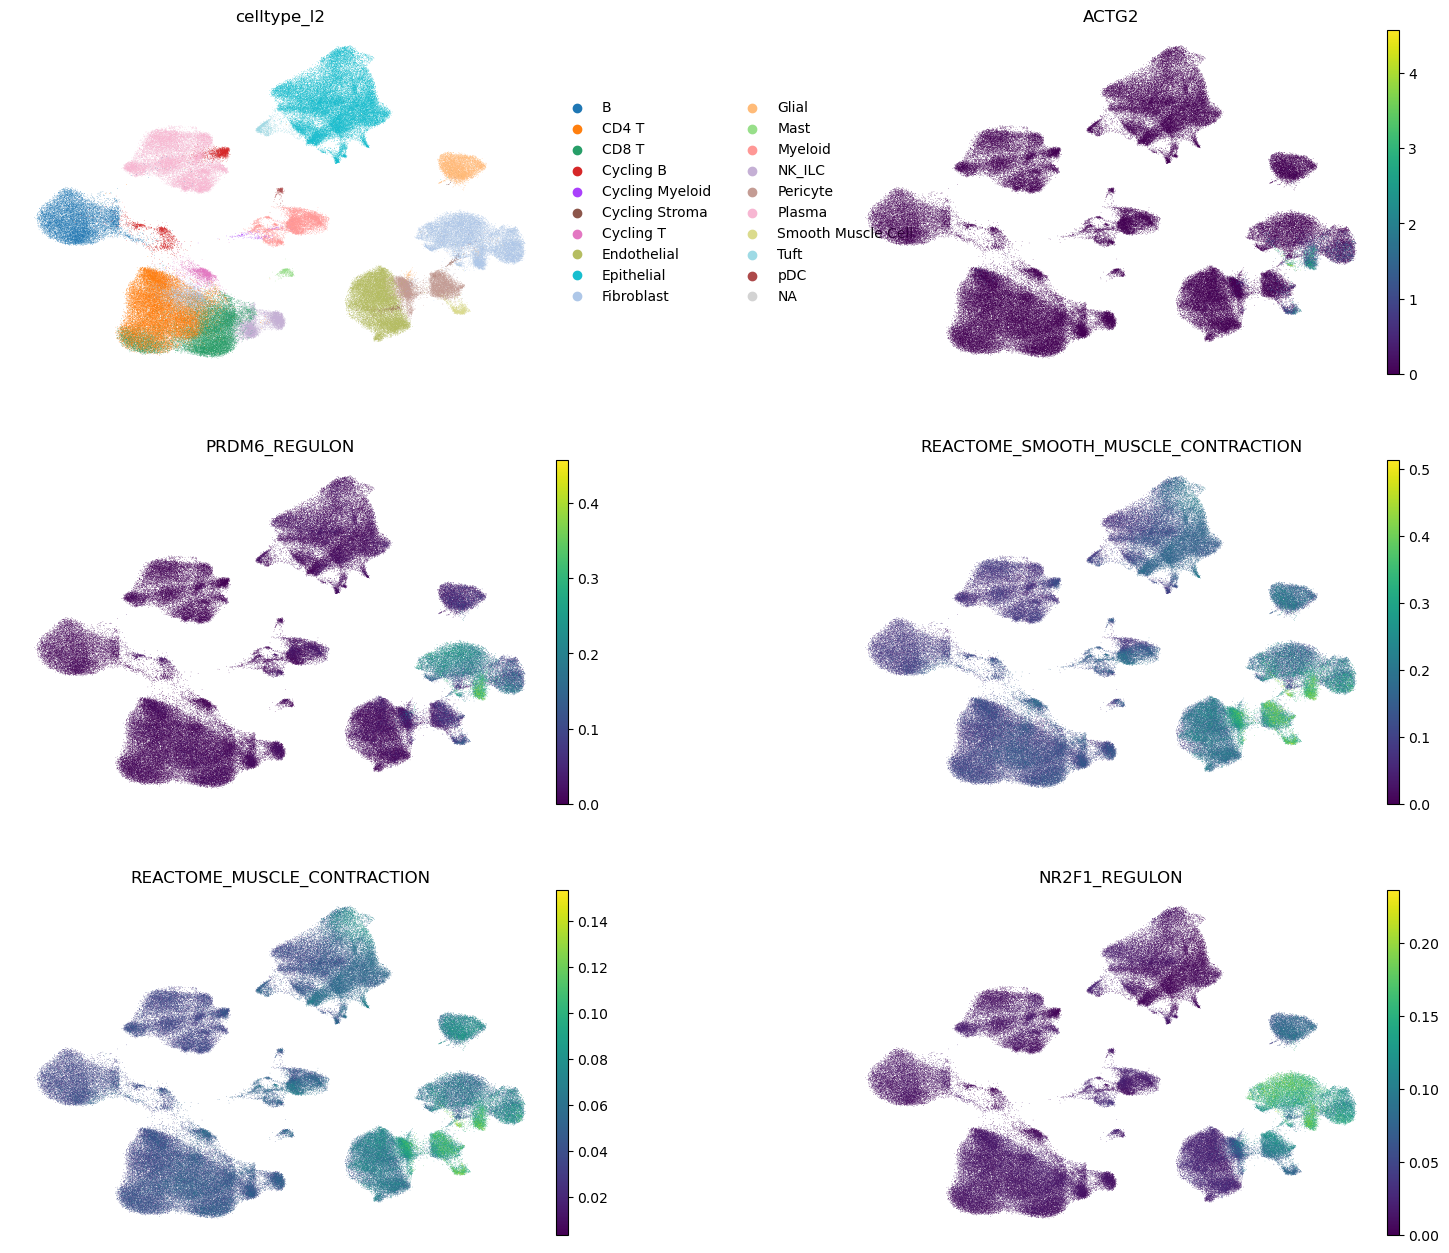

In [3]:
gg.plot_pathways(pathways_goi, GOI)

## Regulon-level gene set enrichment analysis

Now we look into which pathways are significantly enriched in a specific gene set of interest. 
You can pick which gene set to look at by setting the regulon parameter: <code>regulon=['your gene set']</code>
We recommend looking at regulons, but you can also look at a REACTOME gene set. 
Hover over the individual pathways plotted to see more information. 

In [4]:
gprofiler = gg.gGOSt(regulon='PRDM6_REGULON') # set gene set of interest here

## TF-Target Gene Network Visualization

Now we can begin to look into specific TF-GOI pairs in the regulon network. 

In [5]:
# GOI text summary:
goi_grn = gg.make_goi_grn(GOI=GOI)
gg.GOI_network_stats(goi_grn, GOI)
gg.format_gene_summary(goi_grn, GOI)

Summary of ACTG2:

There are 2 regulons that have ACTG2 in their target genes.

Regulons that have ACTG2 in their target genes:

	(TF: GRNBoost2 Importance Score)
	NR2F1: 0.491
	PRDM6: 0.038


There are 95 TFs for ACTG2 that were NOT supported by a regulon (motif analysis),
here are the top 10:

	(TF: GRNBoost2 Importance Score)
	MYLK: 2.776
	RARB: 1.735
	MSRB3: 1.578
	ZNF239: 1.496
	FOXF2: 0.968
	LUZP2: 0.882
	NFATC4: 0.8
	PITX1: 0.779
	ZNF841: 0.741
	SP100: 0.67
	ZNF154: 0.667

ACTG2: 

	Actins are highly conserved proteins that are involved in various types of
	cell motility and in the maintenance of the cytoskeleton. Three types of
	actins, alpha, beta and gamma, have been identified in vertebrates. Alpha actins
	are found in muscle tissues and are a major constituent of the
	contractile apparatus. The beta and gamma actins co-exist in most cell types
	as components of the cytoskeleton and as mediators of internal cell motility.
	This gene encodes actin gamma 2; a smooth muscle act

## Gene-gene Co-Expression Network

We can also look into not only TF-target gene regulatory relationships, but simple gene-gene co-expression patterns. 
Here, we show a gene-gene co-expression matrix for each very coarse cell lineage: B Cells, Epithelium Cells, Myeloid Cells, Stroma Cells, and T Cells. 
Each network is calculated using only gene expression values within these cell lineages. This means that the results here are cell-lineage specific. 

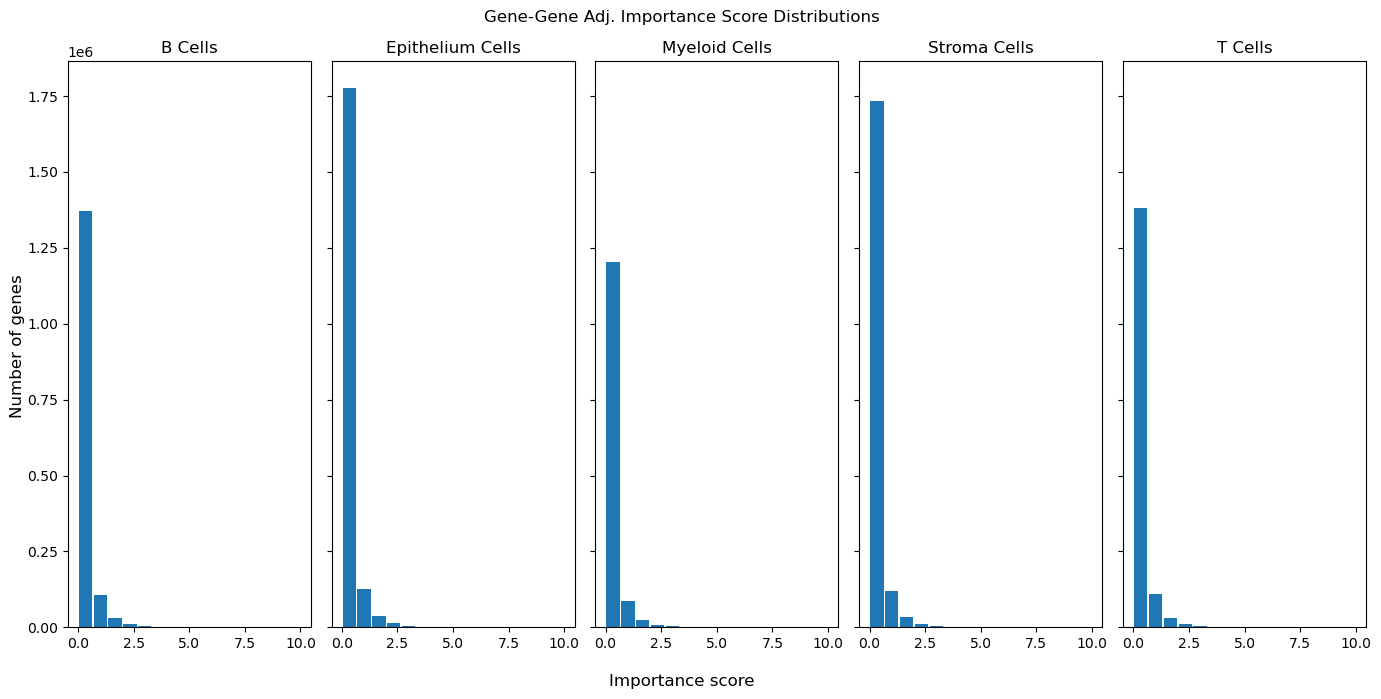

In [6]:
# first: look at importance score distribution for each cell lineage
# set log_scale=True for a log scale of the y-axis (Number of genes)
# set xlim=x for a view of the x-axis from 0 to x 
gg.genegene_importance_histograms(log_scale=False, xlim=10)

You can visualize either the regulon (TF-GOI regulating pairs) or gene-gene (GOI-gene coexpressed pairs) network here. Set the parameter to <code>'regulon'</code> or <code>'gene_gene'</code> for the desired network visualization. The output is interactive, so hover over nodes to see their gene set and move nodes around for a better view! 

In [ ]:
# network visualization
# type = 'gene_gene' for the GOI-gene co-expression network
# type = 'regulon' for the TF-GOI regulon network 
# top_n = n: only show top n direct target genes of each TF or gene

gg.show_network(GOI, type='regulon', top_n=5) # only works on jupyter notebook running in browser (not in VS Code for example)

We apply the same principle of gene set enrichment analysis within the genes that are co-expressed with the GOI in each distinct cell lineage. We simply provide a list of the top three (or less) significantly enriched pathways from REACTOME and KEGG for each gene set, i.e. each set of genes co-expressed with the GOI within each cell lineage. 

In [7]:
gg.gGOSt_listed(GOI)

Top 3 significantly differentially expressed pathways in genes co-expressed with ACTG2, per cell lineage.
This is in REACTOME and KEGG databases.



KeyError: 'result'